# Histogram of Predicted Uncertainties

This plots data written by the `process_uncertainties.py` script.

In [2]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD

sns.set()

In [3]:
dfs = {}

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    dfs[i] = pd.read_csv(
        f"../data/processed/skew_gaussian/k200/delta_window8/processed_daysahead{i}_R000.csv"
    )

dfs[1].head()

,current_time,forward_time,forward_Vp_pred,forward_Vp_obs,forward_mean,forward_sigma,forward_skew,forward_crps
0,2010-01-04 00:00:00,2010-01-04 18:00:00,357.800000,301.66,0.0,77.011450,-0.196457,33.637582
1,2010-01-04 06:00:00,2010-01-05 00:00:00,355.833333,291.15,0.0,74.331541,-0.137231,38.509781
2,2010-01-04 12:00:00,2010-01-05 06:00:00,324.750000,290.25,0.0,74.296985,-0.065474,23.641543
3,2010-01-04 18:00:00,2010-01-05 12:00:00,326.833333,301.98,0.0,69.658997,-0.097306,19.779450
4,2010-01-05 00:00:00,2010-01-05 18:00:00,336.666667,321.81,0.0,67.021870,-0.143377,16.971142


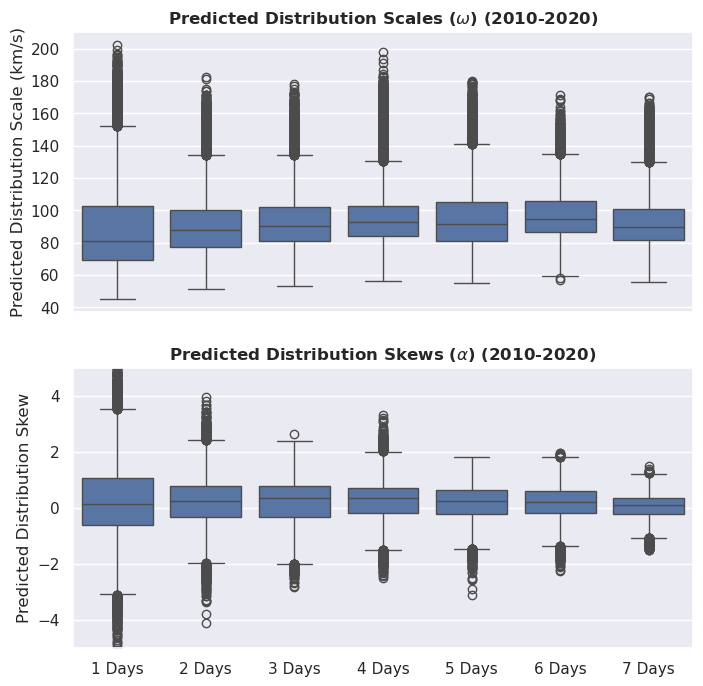

In [17]:
bins = np.arange(35, 190, 1)

fig, axes = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax = axes[0]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_sigma:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Predicted Distribution Scale (km/s)")
# ax.set_xlabel("# Days Ahead")
ax.set_title(r"Predicted Distribution Scales ($\omega$) (2010-2020)", fontweight="bold")

ax = axes[1]
data_list = []
for daysahead, df in dfs.items():
    for value in df.forward_skew:
        data_list.append(dict(group=f"{daysahead} Days", value=value))
sns.boxplot(pd.DataFrame(data_list), x="group", y="value", ax=ax)
ax.set_ylabel(r"Predicted Distribution Skew")
ax.set_label("# Days Ahead")
ax.set_title(r"Predicted Distribution Skews ($\alpha$) (2010-2020)", fontweight="bold")
ax.set_ylim([-5, 5])
ax.set_xlabel("")
fig.savefig("../plots/histogram_of_sigmas.png", dpi=300)